In [1]:
import pandas as pd
df = pd.read_csv("../data/mq_variants_intensity_numeric.csv")
df.head()

,Variant,Variant ID,Unmod variant,Total,Total- Unmodified sequence,Variants- Unmodified sequence,Proteins,Mass,Charge,Num Mods,...,_dyn_#Barasertib_HQPA DMSO.Tech replicate 1 of 1,_dyn_#Baricitinib 1000nM.Tech replicate 1 of 1,_dyn_#Baricitinib 100nM.Tech replicate 1 of 1,_dyn_#Baricitinib 10nM.Tech replicate 1 of 1,_dyn_#Baricitinib 30000nM.Tech replicate 1 of 1,_dyn_#Baricitinib 3000nM.Tech replicate 1 of 1,_dyn_#Baricitinib 300nM.Tech replicate 1 of 1,_dyn_#Baricitinib 30nM.Tech replicate 1 of 1,_dyn_#Baricitinib 3nM.Tech replicate 1 of 1,_dyn_#Baricitinib DMSO.Tech replicate 1 of 1
0,.VADPDHDHTGFLTEYVATR.,93378,.VADPDHDHTGFLTEYVATR.,11372,15019,62,sp|P28482-2|MK01_HUMAN;sp|P28482|MK01_HUMAN,2144.0,2,0,...,402680000.0,69163000.0,430600000.0,341340000.0,96443000.0,84155000.0,182810000.0,296340000.0,272890000.0,254860000.0
1,.LGEHNIDVLEGNEQFINAAK.,50733,.LGEHNIDVLEGNEQFINAAK.,8878,23098,134,TRYP_PIG,2211.1,2,0,...,593480000.0,108270000.0,330300000.0,337470000.0,123930000.0,91085000.0,152910000.0,313690000.0,187600000.0,313290000.0
2,.FRHENIIGINDIIR.,25741,.FRHENIIGINDIIR.,8720,12619,33,sp|P28482-2|MK01_HUMAN;sp|P28482|MK01_HUMAN,1709.9,2,0,...,280180000.0,73203000.0,209690000.0,337270000.0,90528000.0,112760000.0,115160000.0,223460000.0,182890000.0,236530000.0
3,.ESESTAGSFSLSVR.,21292,.ESESTAGSFSLSVR.,7995,8328,7,sp|P06239-2|LCK_HUMAN;sp|P06239-3|LCK_HUMAN;sp...,1456.7,2,0,...,5269500.0,11120000.0,15061000.0,18264000.0,13380000.0,14280000.0,19220000.0,11216000.0,12721000.0,12835000.0
4,.NYLLSLPHK.,68115,.NYLLSLPHK.,7445,11842,41,sp|P28482|MK01_HUMAN,1084.6,2,0,...,247540000.0,231550000.0,481230000.0,591120000.0,250100000.0,300980000.0,290970000.0,477300000.0,363140000.0,43697000.0


In [2]:
import re

# Group by peptide sequence without modifications and list all variants (with modifications)
def extract_peptide_sequence(variant):
    # Remove all modifications in the format 'Letter+Number.Number'
    return re.sub(r"[A-Z]\+[0-9]+\.[0-9]+", "", variant)

# Drop rows with missing Variant
peptide_groups = df.dropna(subset=["Variant"]).copy()
peptide_groups["Peptide"] = peptide_groups["Variant"].apply(extract_peptide_sequence)

# Group by peptide sequence and collect all variants
peptide_to_variants = peptide_groups.groupby("Peptide")["Variant"].unique()

# Filter to only peptides with more than one variant and at least one unmodified variant
def has_unmodified_variant(peptide, variants):
    return peptide in variants

peptides_with_unmod = {
    peptide: [v for v in variants]
    for peptide, variants in peptide_to_variants.items()
    if len(variants) > 1 and has_unmodified_variant(peptide, variants)
}

# Display the result
for peptide, variants in peptides_with_unmod.items():
    print(f"Peptide: {peptide}")
    print("Variants with modifications:")
    for v in variants:
        print(f"  {v}")
    print()

Peptide: .AAEDDEDDDVDTK.
Variants with modifications:
  .AAEDDEDDDVDTK.
  .AAEDDEDDDVDTKK+28.002.

Peptide: .AAENEFVTLKK.
Variants with modifications:
  .Y+8.977AAENEFVTLKK.
  .AAENEFVTLKK.

Peptide: .AAFGQLHK.
Variants with modifications:
  .AAFGQLHK.
  .L+50.018AAFGQLHK.

Peptide: .AAIISAEGDSK.
Variants with modifications:
  .AAIISAEGDSK.
  .K+154.074AAIISAEGDSK.
  .K+183.034AAIISAEGDSK.

Peptide: .ADPDHDHTGFLTEYVATR.
Variants with modifications:
  .ADPDHDHTGFLTEYVATR.
  .V+49.999ADPDHDHTGFLTEYVATR.
  .V+26.011ADPDHDHTGFLTEYVATR.
  .V+40.063ADPDHDHTGFLTEYVATR.
  .V+37.084ADPDHDHTGFLTEYVATR.

Peptide: .ADPEHDHTGFLTEYVATR.
Variants with modifications:
  .I+50.009ADPEHDHTGFLTEYVATR.
  .ADPEHDHTGFLTEYVATR.
  .I+57.995ADPEHDHTGFLTEYVATR.
  .I+27.98ADPEHDHTGFLTEYVATR.

Peptide: .AENDDTYKDDVNHNQK.
Variants with modifications:
  .AENDDTYKDDVNHNQK.
  .AENDDTYKDDVNHNQK+114.044C+57.021K.

Peptide: .AFSSQEPYFSYSGAFK.
Variants with modifications:
  .C+57.021AFSSQEPYFSYSGAFK.
  .AFSSQEPYFSYSGAFK.


In [3]:
# Dictionary to store peptide[drug/DMSO name for the drug]: intensity sum for the drug or DMSO for the drug
peptide_drug_intensity = {}

# Get all drug/DMSO columns (those starting with '_dyn_#')
drug_cols = [col for col in peptide_groups.columns if col.startswith('_dyn_#')]

# Only process variants in peptides_with_unmod
for peptide, variants in peptides_with_unmod.items():
    for variant in variants:
        row = peptide_groups[peptide_groups['Variant'] == variant]
        if not row.empty:
            row = row.iloc[0]
            peptide_drug_intensity[variant] = {}
            for drug_col in drug_cols:
                intensity = row[drug_col]
                if pd.notna(intensity):
                    peptide_drug_intensity[variant][drug_col] = intensity

In [4]:
print(peptide_drug_intensity)

{'.AAEDDEDDDVDTK.': {'_dyn_#AEE-788_inBT474 1000nM.Tech replicate 1 of 1': 23411000.0, '_dyn_#AEE-788_inBT474 100nM.Tech replicate 1 of 1': 38247000.0, '_dyn_#AEE-788_inBT474 10nM.Tech replicate 1 of 1': 19430000.0, '_dyn_#AEE-788_inBT474 30000nM.Tech replicate 1 of 1': 23313000.0, '_dyn_#AEE-788_inBT474 3000nM.Tech replicate 1 of 1': 18220000.0, '_dyn_#AEE-788_inBT474 300nM.Tech replicate 1 of 1': 18107000.0, '_dyn_#AEE-788_inBT474 30nM.Tech replicate 1 of 1': 15743000.0, '_dyn_#AEE-788_inBT474 3nM.Tech replicate 1 of 1': 21333000.0, '_dyn_#AEE-788_inBT474 DMSO.Tech replicate 1 of 1': 13100000.0, '_dyn_#AMG-208_withCAKI 100nM.Tech replicate 1 of 1': 216810.0, '_dyn_#AMG-208_withCAKI 30000nM.Tech replicate 1 of 1': 363590.0, '_dyn_#AMG-208_withCAKI 300nM.Tech replicate 1 of 1': 450870.0, '_dyn_#AMG-208_withCAKI 30nM.Tech replicate 1 of 1': 288870.0, '_dyn_#AMG-208_withCAKI DMSO.Tech replicate 1 of 1': 615680.0, '_dyn_#ARRY-380 1000nM.Tech replicate 1 of 1': 609390.0, '_dyn_#ARRY-380 10

generate a csv to save in ../data/ that for each peptide and each drug/ DMSO group, 

In [5]:
from collections import defaultdict, Counter

def extract_modifications(variant, tol=0.005):
    # Find all modifications in the format 'Letter+Number.Number'
    mods = re.findall(r"([A-Z])\+([0-9]+\.[0-9]+)", variant)
    # Round mass to 2 decimals for tolerance
    return [(aa, round(float(mass), 2)) for aa, mass in mods]

mod_counter_tol = defaultdict(Counter)

for peptide, variants in peptides_with_unmod.items():
    for v in variants:
        for aa, mass in extract_modifications(v, tol=0.01):
            mod_counter_tol[aa][mass] += 1

# Display the modification list and counts
for aa, counter in mod_counter_tol.items():
    print(f"{aa}:")
    for mass, count in counter.items():
        print(f"  {mass:.2f} : {count}")

K:
  28.00 : 1
  154.07 : 1
  183.03 : 1
  114.04 : 1
  154.06 : 1
  168.09 : 1
  256.11 : 1
  54.94 : 1
  70.00 : 2
  79.96 : 1
  39.99 : 1
  9.95 : 1
  182.08 : 1
  27.98 : 1
  58.00 : 1
  50.06 : 1
  41.96 : 1
  55.98 : 1
  183.02 : 1
  59.02 : 1
Y:
  8.98 : 1
  50.01 : 1
L:
  50.02 : 7
  15.99 : 1
  12.00 : 1
  33.00 : 1
  27.99 : 3
  41.98 : 1
  24.00 : 1
  40.01 : 1
  78.02 : 1
  23.99 : 1
  78.01 : 1
  28.00 : 2
  70.03 : 1
  27.00 : 1
  26.01 : 1
  66.01 : 1
  84.04 : 1
  122.04 : 1
  54.02 : 1
  71.05 : 1
  21.99 : 1
  100.01 : 1
  14.01 : 1
  10.91 : 1
  26.02 : 1
  50.01 : 1
  58.01 : 2
  70.00 : 1
  12.06 : 1
  10.99 : 1
  58.00 : 1
  18.09 : 1
  41.00 : 1
  41.01 : 1
V:
  50.00 : 1
  26.01 : 3
  40.06 : 1
  37.08 : 1
  50.02 : 7
  27.99 : 2
  81.02 : 1
  78.01 : 1
  28.00 : 1
  50.01 : 1
  24.00 : 1
  38.95 : 1
  49.99 : 1
  3.89 : 1
  129.03 : 1
  83.03 : 1
  29.02 : 1
  60.04 : 1
I:
  50.01 : 2
  57.99 : 1
  27.98 : 1
  43.02 : 2
  50.02 : 4
  24.00 : 1
  26.99 : 1
  35.

In [6]:
def is_multiple_of_16(mod):
    """Check if the modification mass is a multiple of 16 when rounded to nearest integer."""
    try:
        mass = float(mod.split('+')[1])
        return round(mass) % 16 == 0
    except:
        return False
def should_exclude_modification(mod):
    """Check if a modification should be excluded based on our criteria."""
    # Exclude M+ modifications with mass multiples of 16
    if mod.startswith("M+") and is_multiple_of_16(mod):
        return True
    # Exclude C+57 modifications
    if mod.startswith("C+57"):
        return True
    return False


In [7]:
# Flatten all (aa, mass) and their counts from mod_counter_tol
mod_list = []
for aa, counter in mod_counter_tol.items():
    for mass, count in counter.items():
        mod_str = f"{aa}+{mass:.2f}"
        if not should_exclude_modification(mod_str):
            mod_list.append(((aa, mass), count))

# Sort by count descending
mod_list_sorted = sorted(mod_list, key=lambda x: x[1], reverse=True)

# Display top modifications
for (aa, mass), count in mod_list_sorted:
    print(f"{aa}+{mass:.2f}: {count}")

L+50.02: 7
V+50.02: 7
I+50.02: 4
L+27.99: 3
V+26.01: 3
K+70.00: 2
L+28.00: 2
L+58.01: 2
V+27.99: 2
I+50.01: 2
I+43.02: 2
R+27.99: 2
R+184.08: 2
E+70.00: 2
T+27.99: 2
A+24.00: 2
A+26.01: 2
N+50.02: 2
N+14.05: 2
F+9.03: 2
F+50.01: 2
F+27.99: 2
F+98.00: 2
K+28.00: 1
K+154.07: 1
K+183.03: 1
K+114.04: 1
K+154.06: 1
K+168.09: 1
K+256.11: 1
K+54.94: 1
K+79.96: 1
K+39.99: 1
K+9.95: 1
K+182.08: 1
K+27.98: 1
K+58.00: 1
K+50.06: 1
K+41.96: 1
K+55.98: 1
K+183.02: 1
K+59.02: 1
Y+8.98: 1
Y+50.01: 1
L+15.99: 1
L+12.00: 1
L+33.00: 1
L+41.98: 1
L+24.00: 1
L+40.01: 1
L+78.02: 1
L+23.99: 1
L+78.01: 1
L+70.03: 1
L+27.00: 1
L+26.01: 1
L+66.01: 1
L+84.04: 1
L+122.04: 1
L+54.02: 1
L+71.05: 1
L+21.99: 1
L+100.01: 1
L+14.01: 1
L+10.91: 1
L+26.02: 1
L+50.01: 1
L+70.00: 1
L+12.06: 1
L+10.99: 1
L+58.00: 1
L+18.09: 1
L+41.00: 1
L+41.01: 1
V+50.00: 1
V+40.06: 1
V+37.08: 1
V+81.02: 1
V+78.01: 1
V+28.00: 1
V+50.01: 1
V+24.00: 1
V+38.95: 1
V+49.99: 1
V+3.89: 1
V+129.03: 1
V+83.03: 1
V+29.02: 1
V+60.04: 1
I+57.99: 1
I+

generate a csv for the first 15 most common modificaitons as rows and 15 column of corrosponding unmod version of that amino acid, and for the drugs(including dmso) as columns, each cell should be the sum of the count from from the dictonary above the peptides with that modificaiton and sum it, in the same loop from the peptide with that mod,  add one unmod row for that amino acid as aa+0: and sum as the same peptide but umnod version of that peptide

In [23]:
import pandas as pd
import numpy as np

# Find top 15 most common modifications (by count) from mod_counter_tol
mod_counts = []
for aa, counter in mod_counter_tol.items():
	for mass, count in counter.items():
		mod_str = f"{aa}+{mass:.2f}"
		if not should_exclude_modification(mod_str):
			mod_counts.append((aa, mass, count))

# Sort by count descending and take top 15
mod_counts_sorted = sorted(mod_counts, key=lambda x: x[2], reverse=True)
top_mods = [(aa, mass) for aa, mass, _ in mod_counts_sorted[:15]]
top_mod_labels = [f"{aa}+{mass:.2f}" for aa, mass in top_mods]
print("Top 15 modifications:", top_mod_labels)

Top 15 modifications: ['L+50.02', 'V+50.02', 'I+50.02', 'L+27.99', 'V+26.01', 'K+70.00', 'L+28.00', 'L+58.01', 'V+27.99', 'I+50.01', 'I+43.02', 'R+27.99', 'R+184.08', 'E+70.00', 'T+27.99']


create a csv for every top mod, and a row of that topmod_unmod should be 30 rows all together initialize all values to 0, with drugs as Y values. for each of the top 15 modification, if its in one of the variant of the peptide's dictionrary, sum that peptide unmod to the peptide, drug unmod, and the variants sum to the variant row of that durg 

In [24]:
# Create a DataFrame with 30 rows (15 mods + 15 unmod) and drugs as columns, initialize to 0
# Ensure unmod rows are unique and match the format of mod rows
unmod_rows = [f"{aa}+{mass:.2f}_unmod" for aa, mass in top_mods]
mod_rows = top_mod_labels + unmod_rows
csv_index = mod_rows
csv_columns = df.columns[df.columns.str.startswith('_dyn_#')].tolist()
mod_df = pd.DataFrame(0.0, index=csv_index, columns=csv_columns)

# Helper to extract (aa, mass) from mod label
def parse_mod_label(label):
    if label.endswith('_unmod'):
        return label.replace('_unmod', ''), 0.0
    aa, mass = label.split('+')
    return aa, float(mass)

# For each peptide group
for peptide, variants in peptides_with_unmod.items():
    # Find the unmodified variant for this peptide
    unmod_variant = None
    for v in variants:
        if extract_modifications(v) == []:
            unmod_variant = v
            break
    # For each variant in this peptide group
    for v in variants:
        mods = extract_modifications(v)
        for aa, mass in mods:
            mod_label = f"{aa}+{mass:.2f}"
            if mod_label in top_mod_labels:
                # Add intensities for this variant to the mod row
                if v in peptide_drug_intensity:
                    for drug in csv_columns:
                        mod_df.loc[mod_label, drug] += peptide_drug_intensity[v].get(drug, 0.0)
                # Add intensities for the unmodified variant to the unmod row
                if unmod_variant and unmod_variant in peptide_drug_intensity:
                    unmod_row = f"{aa}+{mass:.2f}_unmod"
                    for drug in csv_columns:
                        mod_df.loc[unmod_row, drug] += peptide_drug_intensity[unmod_variant].get(drug, 0.0)

# Save to CSV
mod_df.to_csv("../data/top_mods_and_unmod_by_drug.csv")

In [25]:
import re

# Merge columns in mod_df by drug name (sum all replicates), but keep each DMSO column separate


def extract_drug_name(col):
    # Remove concentration and replicate info, keep DMSO as is
    # Example: "_dyn_#AEE-788_inBT474 1000nM.Tech replicate 1 of 1" -> "AEE-788_inBT474"
    #          "_dyn_#AEE-788_inBT474 DMSO.Tech replicate 1 of 1" -> "AEE-788_inBT474 DMSO"
    match = re.match(r"_dyn_#([^\s]+)(?:\s+DMSO)?", col)
    if match:
        drug = match.group(1)
        if "DMSO" in col.upper():
            return f"{drug} DMSO"
        else:
            return drug
    return col

# Build new columns: sum all replicates for each drug (excluding DMSO), keep each DMSO column
new_cols = {}
for col in mod_df.columns:

    drug = extract_drug_name(col)
    new_cols[col] = drug

# Group columns by new name and sum
grouped = {}
for new_col in set(new_cols.values()):
    cols = [col for col, group in new_cols.items() if group == new_col]
    grouped[new_col] = mod_df[cols].sum(axis=1) if len(cols) > 1 else mod_df[cols[0]]

# Build merged DataFrame
mod_df_merged = pd.DataFrame(grouped)

# Optional: sort columns (DMSO columns last)
dmso_cols = [col for col in mod_df_merged.columns if "DMSO" in col.upper()]
drug_cols = [col for col in mod_df_merged.columns if col not in dmso_cols]
mod_df_merged = mod_df_merged[drug_cols + dmso_cols]

mod_df_merged.to_csv("../data/top_mods_and_unmod_by_drug_merged.csv")
mod_df_merged.head()

,AV-412_inBT474,Barasertib,AZD-8330,ARRY-380_inBT474,AZD-8186,BMS-777607,BMS-690514,Alectinib,AZD-1480,BMS-777607_withCAKI,...,ARRY-380 DMSO,BYL-719 DMSO,Alisertib DMSO,AT-13148 DMSO,BMS-777607_withCAKI DMSO,Bafetinib DMSO,Amuvatinib DMSO,BMS-777607 DMSO,ASP-3026 DMSO,AXL-1717 DMSO
L+50.02,250629300.0,0.0,0.0,271547200.0,74525500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V+50.02,561218300.0,0.0,0.0,315342500.0,37015600.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I+50.02,282601000.0,0.0,0.0,117880000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,650640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L+27.99,0.0,0.0,0.0,0.0,30621600.0,0.0,0.0,0.0,0.0,1180500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V+26.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


using mod_df_merged,  the dmso of (modified/unmod) as baseline, and test new (mod/unmod) after each drug. for each modification per drug, it will turn red (indicates increment) if the average of peptides' (new moddified/unmod)/ (dmso modified/unmod ) is larger than 1 ; and blue shades if its between 0 and 1

In [26]:
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt

# Prepare ratio matrix: (mod/drug)/(mod/DMSO) / (unmod/drug)/(unmod/DMSO)
# Find DMSO columns
dmso_cols = [col for col in mod_df_merged.columns if "DMSO" in col.upper()]
drug_cols = [col for col in mod_df_merged.columns if col not in dmso_cols]

# For each mod, find its corresponding unmod row
ratio_matrix = np.zeros((len(top_mod_labels), len(drug_cols)))
for i, mod in enumerate(top_mod_labels):
    unmod = mod + "_unmod"
    # Find DMSO column for mod and unmod
    mod_dmso = mod_df_merged.loc[mod, dmso_cols].mean() if len(dmso_cols) > 0 else np.nan
    unmod_dmso = mod_df_merged.loc[unmod, dmso_cols].mean() if len(dmso_cols) > 0 else np.nan
    for j, drug in enumerate(drug_cols):
        mod_val = mod_df_merged.loc[mod, drug]
        unmod_val = mod_df_merged.loc[unmod, drug]
        # Avoid division by zero or nan
        if (mod_dmso == 0 or unmod_dmso == 0 or np.isnan(mod_dmso) or np.isnan(unmod_dmso) or
            mod_val == 0 or unmod_val == 0 or np.isnan(mod_val) or np.isnan(unmod_val)):
            ratio_matrix[i, j] = np.nan
            # print(f"Warning: Invalid ratio for {mod} in {drug} is nan")
        else:
            ratio_matrix[i, j] = (mod_val / mod_dmso) / (unmod_val / unmod_dmso)
            # if ratio_matrix[i, j] == 1:
                # print (f"Warning: Ratio for {mod} in {drug} is exactly 1, which may indicate no change.")



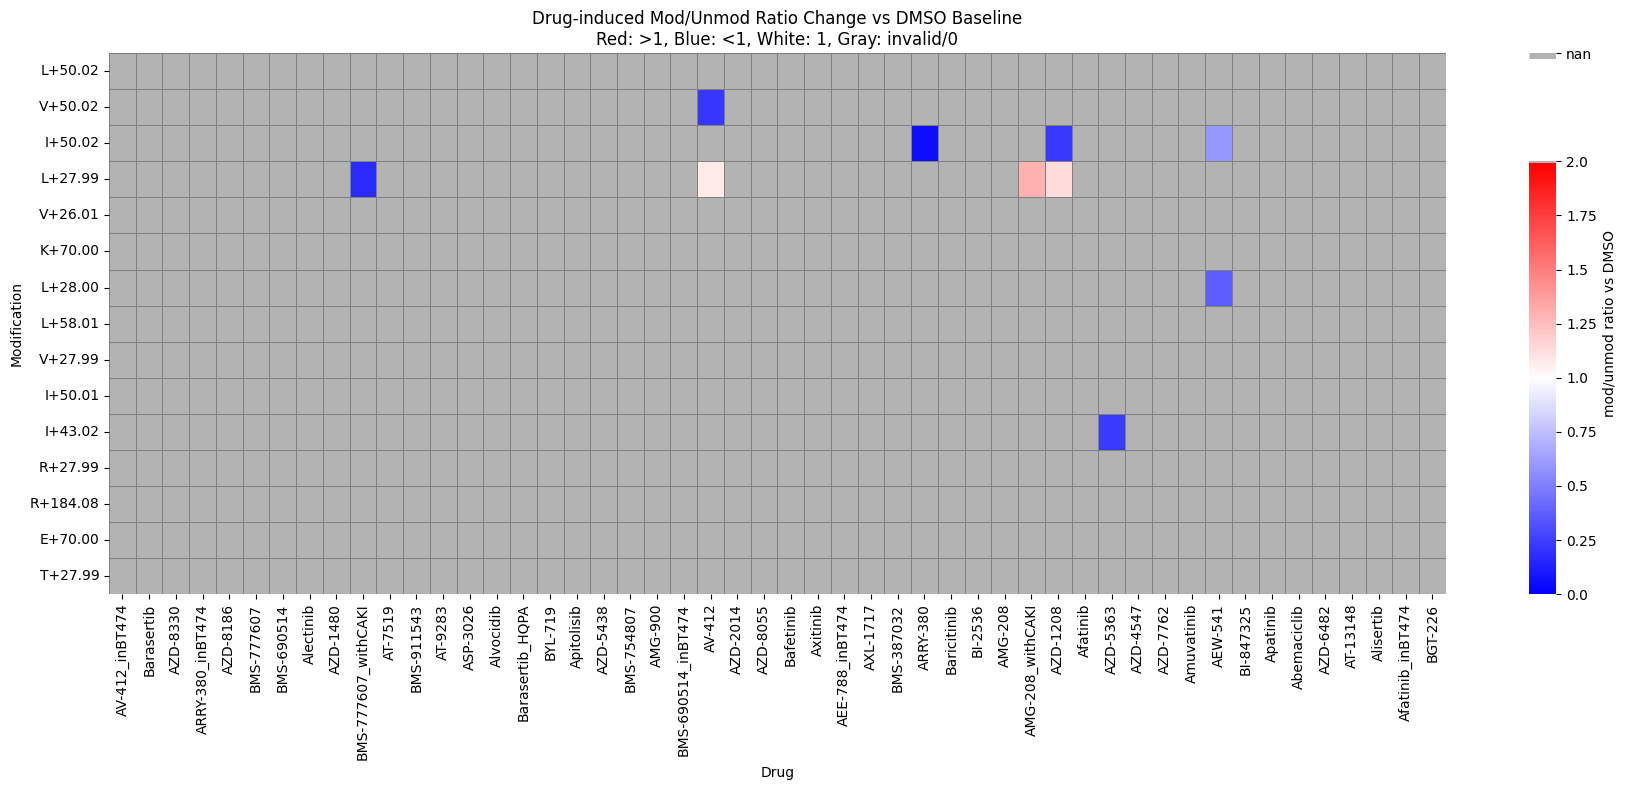

In [27]:

plt.figure(figsize=(18, 8))
# Define a custom colormap: blue (<0), white (=0), red (>0), gray (nan)

# Create a colormap: blue-white-red, with gray for nan
cmap = plt.get_cmap("bwr")
# Add gray for nan values
colors = cmap(np.linspace(0, 1, 256))
gray = np.array([0.7, 0.7, 0.7, 1.0])  # RGBA for gray
cmap_with_nan = ListedColormap(np.vstack([colors, gray]))

# Create a mask for nan values
mask = np.isnan(ratio_matrix)

# Set nan values to a value outside the normal range for mapping to gray
plot_matrix = ratio_matrix.copy()
plot_matrix[mask] = 100  # 100 will be mapped to gray
# Set vmin/vmax so 1 is white, <1 is blue, >1 is red
sns.heatmap(
    plot_matrix,
    annot=False,
    fmt=".2f",
    cmap=cmap_with_nan,
    center=1,
    mask=None,  # We handle nan coloring ourselves
    xticklabels=drug_cols,
    yticklabels=top_mod_labels,
    cbar_kws={'label': 'mod/unmod ratio vs DMSO'},
    vmin=0, vmax=2,  # Adjust as needed for your data range
    linewidths=0.5,   # Add grid lines
    linecolor='gray'  # Grid color
)

# Patch the colorbar to show gray for nan
cbar = plt.gca().collections[0].colorbar
ncolors = cmap_with_nan.N
cbar.set_ticks(list(cbar.get_ticks()) + [2.5])
cbar.set_ticklabels(list(map(str, cbar.get_ticks()[:-1])) + ['nan'])
cbar.ax.plot([0, 1], [2.5, 2.5], color=gray, linewidth=8, solid_capstyle='butt')
plt.title("Drug-induced Mod/Unmod Ratio Change vs DMSO Baseline\nRed: >1, Blue: <1, White: 1, Gray: invalid/0")
plt.xlabel("Drug")
plt.ylabel("Modification")
plt.tight_layout()
plt.show()
